Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
!pip install Augmentor

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import glob
from pathlib import Path
import Augmentor

In [5]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

# Define paths to dataset
base_path = r"/content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment"
dataset_folder = "Skin_cancer_data"
dataset_path = os.path.join(base_path, dataset_folder)

dataset_path
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(dataset_path) / "Train"
data_dir_test = pathlib.Path(dataset_path) / "Test"

print(f"Does Train Path Right: {data_dir_train.exists()}")
print(f"Does Test Path Right: {data_dir_test.exists()}")

Does Train Path Right: True
Does Test Path Right: True


In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f'Number of image in training set: {image_count_train}')
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f'Number of image in test set: {image_count_test}')

Number of image in training set: 2239
Number of image in test set: 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = 'training',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = 'validation',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(f'List of classes of skin cancers:\n' + "\n".join(class_names))

List of classes of skin cancers:
actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [12]:
# Get the first class folder
sample_class = next(data_dir_train.iterdir())

In [13]:
# Get a list of images in the class folder
sample_images = list(sample_class.glob("*.jpg"))

In [14]:
# Select a sample image (e.g., the 10th image)
sample_image_path = sample_images[10]
sample_image_path

PosixPath('/content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/actinic keratosis/ISIC_0025780.jpg')

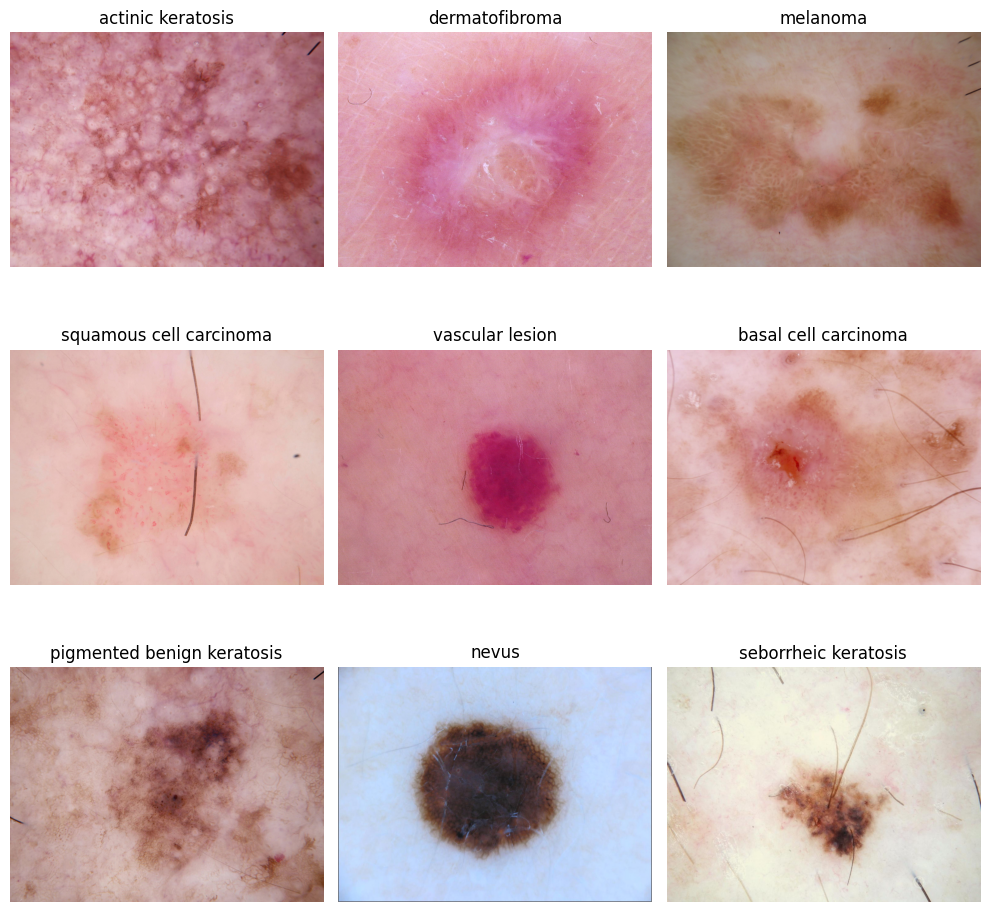

In [15]:
### your code goes here, you can use training or validation data to visualize

# Open image using PIL
image_pil = PIL.Image.open(sample_image_path)

# Convert PIL image to NumPy array
image_np = np.array(image_pil)

def display_sample_images(data_dir_train):
    """
    Randomly selects one image from each class in the training directory
    and displays them in a 3x3 grid with class names as titles.
    """
    import random
    # Convert to pathlib Path
    train_path = pathlib.Path(data_dir_train)

    # Get all class directories
    class_dirs = [d for d in train_path.iterdir() if d.is_dir()]

    # Set up the figure for a 3x3 grid
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))

    for ax, class_dir in zip(axes.flatten(), class_dirs):
        # Get all images in the class directory
        image_files = list(class_dir.glob("*.jpg"))

        # Randomly select one image from the class
        if image_files:
            sample_image_path = random.choice(image_files)

            # Open the image with PIL
            image = PIL.Image.open(sample_image_path)

            # Display image
            ax.imshow(image)
            ax.set_title(class_dir.stem)
            ax.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function
display_sample_images(data_dir_train)

In [16]:
# Print shape, data type, and pixel range
print(f"Image Path: {sample_image_path}")
print(f"Original Image Shape (PIL): {image_pil.size}")
print(f"Original Image Shape (NumPy Array): {image_np.shape}")
print(f"Data Type: {image_np.dtype}")
print(f"Pixel Value Range: Min={image_np.min()}, Max={image_np.max()}")

Image Path: /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/actinic keratosis/ISIC_0025780.jpg
Original Image Shape (PIL): (600, 450)
Original Image Shape (NumPy Array): (450, 600, 3)
Data Type: uint8
Pixel Value Range: Min=7, Max=212


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [18]:
### Your code goes here
# Build CNN Model
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [19]:
### Todo, choose an appropirate optimiser and loss function

# Compile Model
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,393 (82.61 MB)

 Trainable params: 21,656,393 (82.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [21]:
tf.config.set_soft_device_placement(True)


epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.1931 - loss: 3.6711 - val_accuracy: 0.1588 - val_loss: 2.0334
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2559 - loss: 2.0291 - val_accuracy: 0.2908 - val_loss: 2.2706
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2830 - loss: 1.9588 - val_accuracy: 0.4228 - val_loss: 1.7532
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3628 - loss: 1.7867 - val_accuracy: 0.4072 - val_loss: 1.6365
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3889 - loss: 1.7053 - val_accuracy: 0.4318 - val_loss: 1.6622
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4140 - loss: 1.6610 - val_accuracy: 0.4541 - val_loss: 1.5663
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4469 - loss: 1.5486 - val_accuracy: 0.3490 - val_loss: 1.7561
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4202 - loss: 1.6219 - val_accuracy: 0.5101 - v

### Visualizing training results

In [22]:
# Function to Plot the training accuracy and loss
def plot_training_history(history, epochs):
    """
    Plots the training and validation accuracy/loss over epochs.

    Parameters:
    - history: Keras History object containing training metrics.
    - epochs: Number of epochs used for training.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(10, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.show()

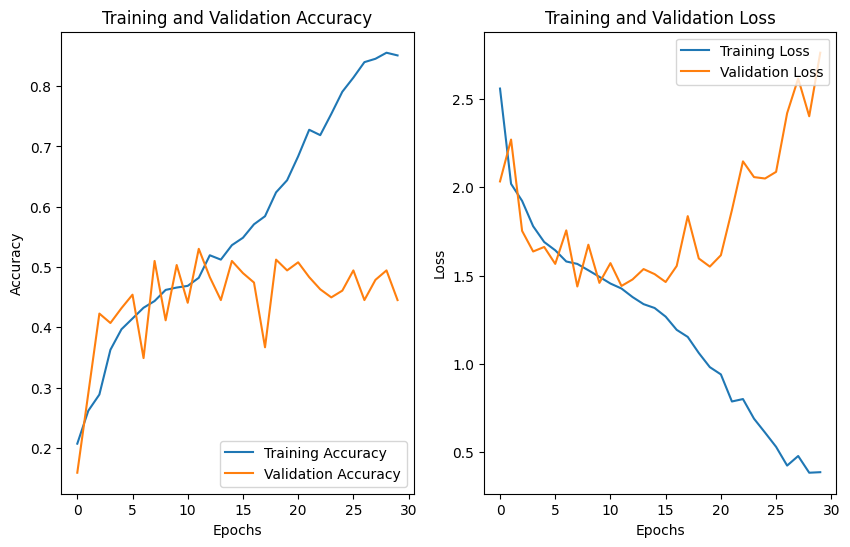

In [23]:
# Plotting the accuracy and Loss
plot_training_history(history, epochs)

##Observations from the Graphs
1. Training Accuracy (Left Graph, Blue Line):

  - Increases steadily and reaches ~85% by the final epoch.
  - This indicates the model is learning well on the training set.
2. Validation Accuracy (Left Graph, Orange Line):

  - Fluctuates significantly and remains low (~50%), failing to improve.
  - This suggests the model is not generalizing well to unseen data.
3. Training Loss (Right Graph, Blue Line):

  - Decreases continuously, which is expected as the model learns.
4. Validation Loss (Right Graph, Orange Line):

  - Initially decreases but starts increasing again after a few epochs.
  - This is a clear sign of overfitting, meaning the model is memorizing training data rather than learning general patterns.


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [24]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

data_augmentation1 = tf.keras.Sequential([
tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1, fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.1, fill_mode='nearest'),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest'),
    tf.keras.layers.Resizing(img_height, img_width)
])

In [25]:
def visualize_augmentations(dataset, augmentation_layer, num_augmentations=5):
    """
    Fetches a sample image from the dataset, applies data augmentation multiple times,
    and visualizes the original and augmented images.

    Parameters:
    - dataset: The TensorFlow dataset to fetch the image from.
    - augmentation_layer: A tf.keras.Sequential augmentation model.
    - num_augmentations: Number of augmented versions to generate (default: 5).
    """
    # Fetch one sample image
    def get_sample_image(dataset):
        for img, label in dataset.take(1):  # Take one sample
            return img[0].numpy().astype("uint8")  # Convert to uint8 for visualization

    original_img = get_sample_image(dataset)

    # Apply augmentation multiple times
    augmented_images = [
        augmentation_layer(tf.expand_dims(original_img, 0), training=True)[0].numpy().astype("uint8")
        for _ in range(num_augmentations)
    ]

    # Plot original and augmented images
    plt.figure(figsize=(10, 6))

    # Show original image
    plt.subplot(1, num_augmentations + 1, 1)
    plt.imshow(original_img)
    plt.title("Original")
    plt.axis("off")

    # Show augmented images
    for i in range(num_augmentations):
        plt.subplot(1, num_augmentations + 1, i + 2)
        plt.imshow(augmented_images[i])
        plt.title(f"Augmented {i+1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

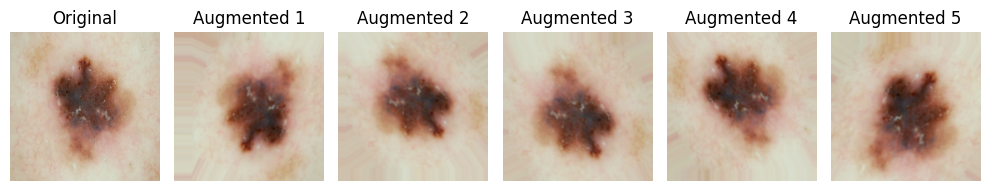

In [26]:
#visualizing the augumented images
visualize_augmentations(train_ds, data_augmentation1)

In [27]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# Build CNN Model
model2 = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    data_augmentation1,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

In [28]:
# Compile Model
model2.compile(optimizer='RMSprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [29]:
# View the summary of all layers
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,393 (82.61 MB)

 Trainable params: 21,656,393 (82.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train Model
tf.config.set_soft_device_placement(True)

history2 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.1787 - loss: 2.7942 - val_accuracy: 0.2058 - val_loss: 2.0475
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.1846 - loss: 2.0663 - val_accuracy: 0.3087 - val_loss: 1.9226
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.2864 - loss: 1.9003 - val_accuracy: 0.3445 - val_loss: 1.8295
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.3360 - loss: 1.8058 - val_accuracy: 0.3468 - val_loss: 1.7079
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3388 - loss: 1.7766 - val_accuracy: 0.3826 - val_loss: 1.6608
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.4059 - loss: 1.6798 - val_accuracy: 0.3535 - val_loss: 1.7820
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3742 - loss: 1.7088 - val_accuracy: 0.4564 - val_loss: 1.6195
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4192 - loss: 1.6355 - val_accuracy: 0.4609 - v

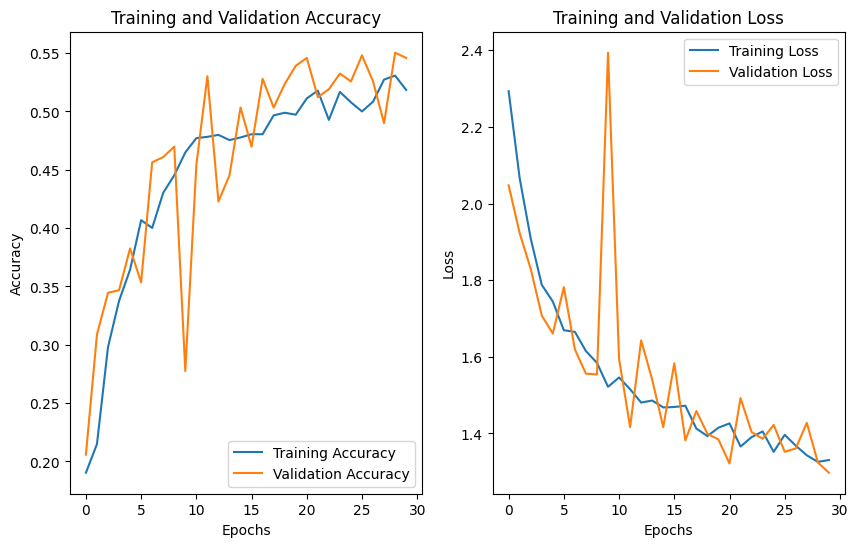

In [31]:
# Plotting the accuracy and Loss
plot_training_history(history2, epochs)

## Observations from Model 2 Graphs:
Your second model has better generalization compared to the first model, likely due to data_augmentation1. Here’s what I see:

1. Training vs. Validation Accuracy (Left Graph)
  - Training and validation accuracy increase together, reducing the overfitting seen in Model 1.
  - Validation accuracy fluctuates initially but then stabilizes around 55%, which is an improvement.
  - Training accuracy is also around 55%, suggesting the model isn’t overfitting as before.

2. Training vs. Validation Loss (Right Graph)
  - Both training and validation loss decrease consistently, meaning the model is learning properly.
  - There are some fluctuations in validation loss, but they are less severe than before.

In [32]:
data_augmentation2 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),  # Rotate without fill_mode, we will crop later
    tf.keras.layers.RandomZoom(0.1),  # Zoom without fill_mode
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1),  # Translate without fill_mode
    tf.keras.layers.CenterCrop(int(img_height * 0.9), int(img_width * 0.9)),  # Crop 90% of the original size
    tf.keras.layers.Resizing(img_height, img_width)  # Resize back to target size
])

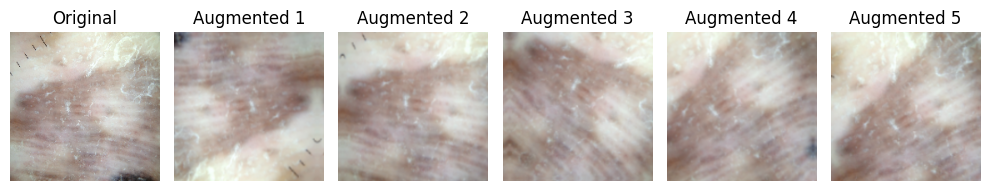

In [33]:
#visualizing the augumented images
visualize_augmentations(train_ds, data_augmentation2)

In [34]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# Build CNN Model
model3 = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    data_augmentation2,

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

In [35]:
# Compile Model
model3.compile(optimizer='RMSprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [36]:
# View the summary of all layers
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,393 (82.61 MB)

 Trainable params: 21,656,393 (82.61 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train Model
tf.config.set_soft_device_placement(True)

history3 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2015 - loss: 2.6298 - val_accuracy: 0.2081 - val_loss: 2.2262
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.2696 - loss: 1.9965 - val_accuracy: 0.4004 - val_loss: 1.7491
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3304 - loss: 1.8491 - val_accuracy: 0.3423 - val_loss: 1.7380
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3831 - loss: 1.7146 - val_accuracy: 0.4698 - val_loss: 1.5917
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4199 - loss: 1.6628 - val_accuracy: 0.4407 - val_loss: 1.6358
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4405 - loss: 1.5791 - val_accuracy: 0.5101 - val_loss: 1.4646
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.4557 - loss: 1.5622 - val_accuracy: 0.4340 - val_loss: 1.6499
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4370 - loss: 1.5557 - val_accuracy: 0.5011 - v

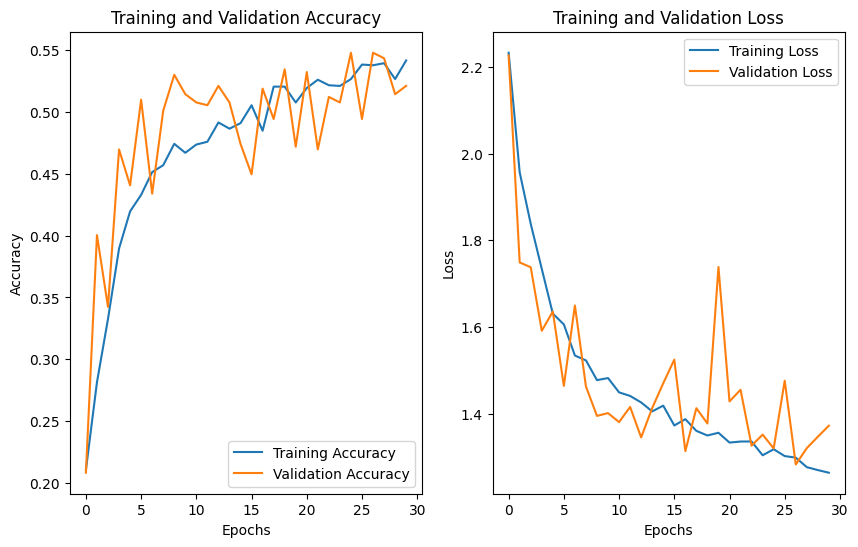

In [38]:
# Plotting the accuracy and Loss
plot_training_history(history3, epochs)

## Observations from Model 3 Graphs:
Model 3 performance is quite similar to Model 2, but with some improvements in stability.

1. Training vs. Validation Accuracy (Left Graph)
  - Smoother accuracy curves compared to Model 2.
  - Validation accuracy reaches ~55%, maintaining consistency.
  - Training accuracy also hovers around 55%, indicating minimal overfitting.

2. Training vs. Validation Loss (Right Graph)
  - Training and validation loss decrease together, showing proper learning.
  - Validation loss has fluctuations, but overall it aligns well with training loss.
  - Lower final loss compared to Model 2, suggesting better optimization.

### Todo:
### Create the model, compile and train the model


In [39]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model4 = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    data_augmentation2,

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(9, activation='softmax')
])

### Compiling the model

In [40]:
# Compile Model
model4.compile(optimizer='RMSprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [41]:
# View the summary of all layers
model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,393 (82.61 MB)

 Trainable params: 21,656,393 (82.61 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [42]:
# Train Model
tf.config.set_soft_device_placement(True)

history4 = model4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.1669 - loss: 2.9780 - val_accuracy: 0.1924 - val_loss: 2.0755
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.1994 - loss: 2.1204 - val_accuracy: 0.2416 - val_loss: 1.9005
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.2769 - loss: 1.9593 - val_accuracy: 0.2192 - val_loss: 2.0001
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.2976 - loss: 1.8900 - val_accuracy: 0.4094 - val_loss: 1.6923
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3221 - loss: 1.8743 - val_accuracy: 0.4183 - val_loss: 1.6535
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3233 - loss: 1.8122 - val_accuracy: 0.4452 - val_loss: 1.6113
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.3810 - loss: 1.7093 - val_accuracy: 0.4810 - val_loss: 1.5524
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.3950 - loss: 1.6707 - val_accuracy: 0.4072 - v

### Visualizing the results

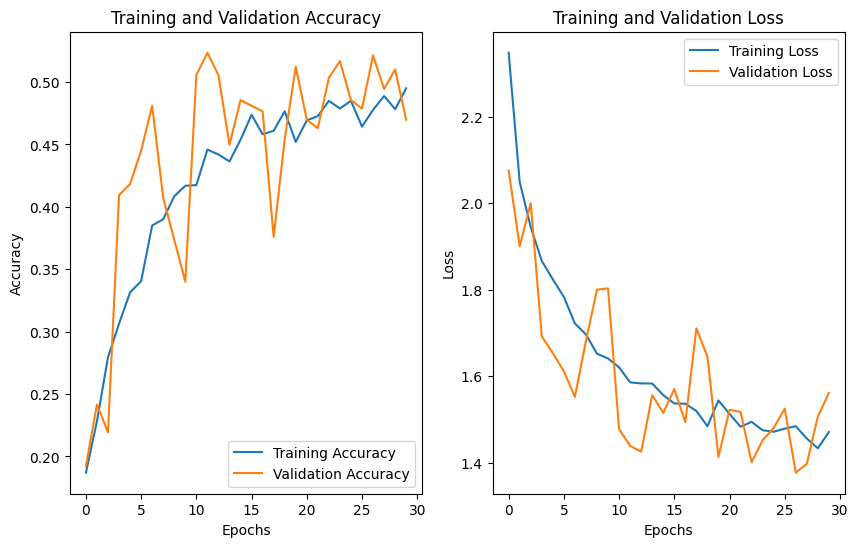

In [43]:
# Plotting the accuracy and Loss
plot_training_history(history4, epochs)

## Observations from Model 4 Graphs:
Model 4 introduces Dropout layers, which aim to improve generalization and reduce overfitting. Let's analyze the performance.

1. Training vs. Validation Accuracy (Left Graph)
  - Training and validation accuracy are more stable than previous models.
  - Final validation accuracy is ~51%, slightly lower than Model 3 (~55%).
  - Less overfitting compared to Model 3—training accuracy does not significantly surpass validation accuracy.

2. Training vs. Validation Loss (Right Graph)
  - Loss decreases for both training and validation, showing effective learning.
  - Validation loss is still fluctuating, but it follows the training loss better than before.
  - The final training loss is ~1.4, indicating that the model is not overfitting too much.

In [44]:
model5 = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(9, activation='softmax')
])

# Model summary to check the architecture
model5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 87, 87, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,8

 Total params: 21,659,849 (82.63 MB)

 Trainable params: 21,658,121 (82.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [45]:
# Compile Model
model5.compile(optimizer='RMSprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [46]:
epochs = 30
## Your code goes here, use 50 epochs.
# Train Model
tf.config.set_soft_device_placement(True)

history5 = model5.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.2904 - loss: 2.5036 - val_accuracy: 0.1499 - val_loss: 3.5603
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.3842 - loss: 1.9430 - val_accuracy: 0.1499 - val_loss: 4.2480
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4269 - loss: 1.7271 - val_accuracy: 0.1521 - val_loss: 3.1911
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4714 - loss: 1.5516 - val_accuracy: 0.1633 - val_loss: 3.3842
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4861 - loss: 1.5188 - val_accuracy: 0.1767 - val_loss: 3.3152
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5045 - loss: 1.4208 - val_accuracy: 0.2058 - val_loss: 4.3346
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5387 - loss: 1.2982 - val_accuracy: 0.2416 - val_loss: 2.7024
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5275 - loss: 1.3401 - val_accuracy: 0.3132 - 

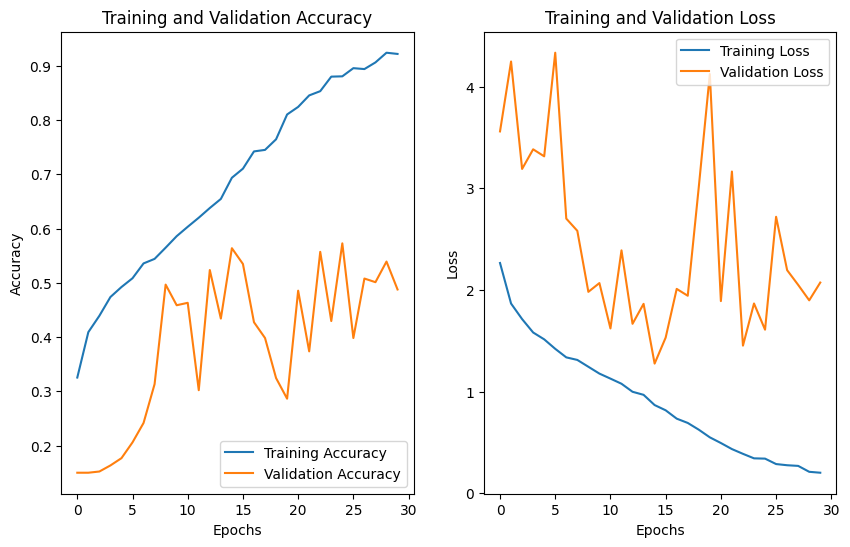

In [47]:
# Plotting the accuracy and Loss
plot_training_history(history5, epochs)

## Observations from Model 5 Graphs:
Model 5 added Batch Normalization layers to stabilize training and improve generalization. Let’s analyze the impact.

1. Training vs. Validation Accuracy (Left Graph)
  - Training accuracy reached ~92%, showing that the model learned effectively.
  - Validation accuracy fluctuates a lot (between ~20% and ~55%), meaning the model struggles with generalization.
  - Overfitting is more severe than in Model 4—the gap between training and validation accuracy is very large.

2. Training vs. Validation Loss (Right Graph)
  - Training loss continuously decreases, which is expected.
  - Validation loss fluctuates wildly, sometimes spiking above 4.0!
  - The validation loss does not follow the training loss trend, indicating instability in validation performance.

  > So in the Final model I will be removing the batch normalization as it makes the model over fitting.

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [48]:
def plot_class_distribution(dataset, class_names):
    """
    Function to visualize the class distribution in a dataset.

    Args:
        dataset: TensorFlow dataset (e.g., train_ds)
        class_names: List of class names corresponding to labels
    """
    from collections import Counter

    # Extract labels from dataset and flatten
    all_labels = np.concatenate([labels.numpy() for _, labels in dataset])

    # Count occurrences of each class
    class_counts = Counter(all_labels)

    # Sort classes by label index
    sorted_classes = sorted(class_counts.keys())
    sorted_counts = [class_counts[label] for label in sorted_classes]

    # Plot class distribution
    plt.figure(figsize=(10, 5))
    plt.bar(sorted_classes, sorted_counts, color='skyblue')
    plt.xlabel("Class Labels")
    plt.ylabel("Number of Samples")
    plt.title("Class Distribution in Training Data")
    plt.xticks(sorted_classes, [class_names[i] for i in sorted_classes], rotation=45)  # Map indices to names

    # Print class with min and max samples
    min_class = sorted_classes[np.argmin(sorted_counts)]
    max_class = sorted_classes[np.argmax(sorted_counts)]
    print(f"Class with least samples: {class_names[min_class]} ({class_counts[min_class]} samples)")
    print(f"Class with most samples: {class_names[max_class]} ({class_counts[max_class]} samples)")

    plt.show()


Class with least samples: seborrheic keratosis (58 samples)
Class with most samples: pigmented benign keratosis (370 samples)


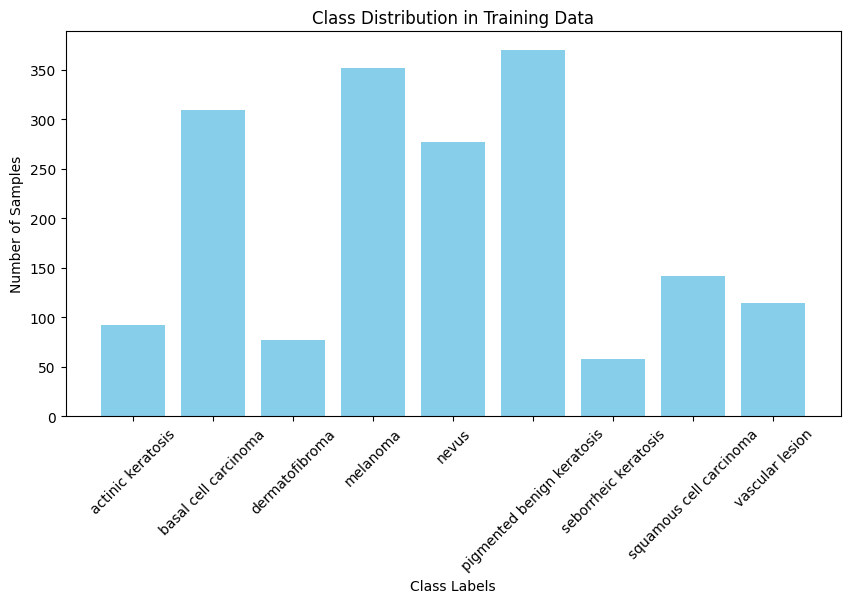

In [49]:
#Plotting the Class Distribution before augmentation
plot_class_distribution(train_ds, class_names)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [50]:
path_to_training_dataset = Path(data_dir_train)

for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset / i))  # Convert to string for Augmentor

    # Horizontal & Vertical Flip
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)

    # Rotation
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    # Zoom
    p.zoom_random(probability=0.5, percentage_area=0.9)

    # Contrast Adjustment
    p.random_contrast(probability=0.5, min_factor=0.8, max_factor=1.2)

    # Translation (using shear)
    p.shear(probability=0.5, max_shear_left=5, max_shear_right=5)

    # Generate 500 augmented samples per class
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3C740799D0>: 100%|██████████| 500/500 [00:27<00:00, 18.11 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3C883B3B50>: 100%|██████████| 500/500 [00:30<00:00, 16.36 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3C8819E710>: 100%|██████████| 500/500 [00:31<00:00, 15.73 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7E3C881D7350>: 100%|██████████| 500/500 [02:31<00:00,  3.31 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7E3C88391A10>: 100%|██████████| 500/500 [01:59<00:00,  4.19 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3C907C4C10>: 100%|██████████| 500/500 [00:32<00:00, 15.58 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E3C881D7A10>: 100%|██████████| 500/500 [01:04<00:00,  7.76 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3C8814A090>: 100%|██████████| 500/500 [00:28<00:00, 17.80 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab_Notebooks/CNN_assignment/Skin_cancer_data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3C88393C90>: 100%|██████████| 500/500 [00:27<00:00, 18.21 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [51]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [52]:
# Get original image paths (without 'output' subfolder)
original_path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]

# Extract class labels (folder names)
original_lesion_list = [os.path.basename(os.path.dirname(y)) for y in original_path_list]

# Create DataFrame for original images
original_dataframe_dict = dict(zip(original_path_list, original_lesion_list))
original_df = pd.DataFrame(list(original_dataframe_dict.items()), columns=['Path', 'Label'])

### Lets see the distribution of augmented data after adding new images to the original training data.

In [53]:
# Get output image paths
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]

# Extract class labels
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in path_list_new]

# Create DataFrame for output images
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])

In [54]:
# Concatenate original data and output data
new_df = pd.concat([original_df, df2], ignore_index=True)

In [55]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [57]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [61]:
data_dir_train = pathlib.Path(dataset_path) / "Train"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [62]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [63]:
model6 = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(9, activation='softmax')
])

# Model summary to check the architecture
model6.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │      21,233,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,656,393 (82.61 MB)

 Trainable params: 21,656,393 (82.61 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [64]:
# Compile Model
model6.compile(optimizer='RMSprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#### **Todo:**  Train your model

In [65]:
epochs = 30
## Your code goes here, use 50 epochs.
# Train Model
tf.config.set_soft_device_placement(True)

history6 = model5.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 258ms/step - accuracy: 0.5431 - loss: 1.6360 - val_accuracy: 0.4610 - val_loss: 1.8753
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 238ms/step - accuracy: 0.6175 - loss: 1.0851 - val_accuracy: 0.5754 - val_loss: 1.1646
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 36s 215ms/step - accuracy: 0.6697 - loss: 0.8876 - val_accuracy: 0.4105 - val_loss: 1.7143
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 212ms/step - accuracy: 0.7303 - loss: 0.7448 - val_accuracy: 0.3304 - val_loss: 3.6494
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 235ms/step - accuracy: 0.7642 - loss: 0.6156 - val_accuracy: 0.4024 - val_loss: 1.9356
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.8036 - loss: 0.5336 - val_accuracy: 0.3838 - val_loss: 3.7147
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 38s 217ms/step - accuracy: 0.8362 - loss: 0.4366 - val_accuracy: 0.3630 - val_loss: 3.9157
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 35s 208ms/step - accuracy: 0.8692 - loss: 0

#### **Todo:**  Visualize the model results

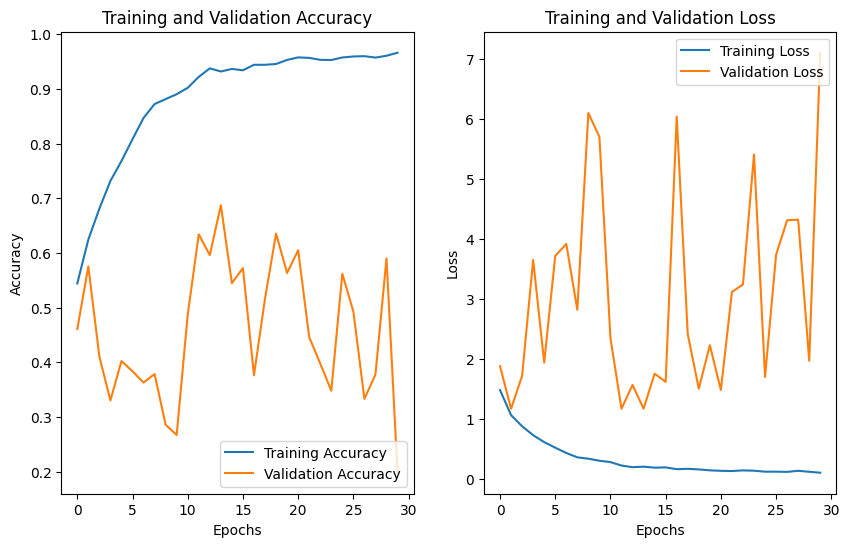

In [66]:
# Plotting the accuracy and Loss
plot_training_history(history6, epochs)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## Observations from Model 6 Graphs
- The training accuracy reaches ~99%, while validation accuracy fluctuates heavily, indicating poor generalization.
- Training loss consistently decreases, while validation loss is erratic and increases at times, a classic sign of overfitting.